# **Kelompok**
Room 17

* I Putu Dodik Sukma Indranata (Optima)
* Karel A Karim Mewal (Optima)
* Mahrus Sholeh (Danger)
* Nicky Nicholas (Alfatih)
* Steven Christ Pinantyo Arwidarasto (Alfatih)


Load Data

In [2]:
import tarfile, os
  
# open file
file = tarfile.open('/tmp/Brain_tumor_dataset.tar.xz')
  
# extracting file
file.extractall('/tmp/Brain_tumor_dataset')
  
file.close()

In [40]:
train_brain_tumor_no = os.path.join('/tmp/Brain_tumor_dataset/archive/brain_tumor_dataset/no')
train_brain_tumor_yes = os.path.join('/tmp/Brain_tumor_dataset/archive/brain_tumor_dataset/yes')

valid_brain_tumor_no= os.path.join('/tmp/Brain_tumor_dataset/archive/no')
valid_brain_tumor_yes= os.path.join('/tmp/Brain_tumor_dataset/archive/yes')

In [41]:
train_braintumor_no_names = os.listdir(train_brain_tumor_no)
print(train_braintumor_no_names[:10])

train_braintumor_yes_names = os.listdir(train_brain_tumor_yes)
print(train_braintumor_yes_names[:10])

valid_braintumor_no_names = os.listdir(valid_brain_tumor_no)
print(valid_braintumor_no_names[:10])

valid_braintumor_yes_names = os.listdir(valid_brain_tumor_yes)
print(valid_braintumor_yes_names[:10])

['No17.jpg', '50 no.jpg', 'no 99.jpg', '44no.jpg', 'N6.jpg', '6 no.jpg', 'N11.jpg', 'No18.jpg', 'no.jpg', 'no 90.jpg']
['Y55.jpg', 'Y66.JPG', 'Y155.JPG', 'Y249.JPG', 'Y32.jpg', 'Y253.JPG', 'Y51.jpg', 'Y74.jpg', 'Y258.JPG', 'Y98.JPG']
['27 no.jpg', '20 no.jpg', '21 no.jpg', '1 no.jpeg', '12 no.jpg', '18 no.jpg', '14 no.jpg', '19 no.jpg', '25 no.jpg', '.ipynb_checkpoints']
['Y155.JPG', 'Y13.jpg', 'Y100.JPG', 'Y112.JPG', 'Y102.jpg', 'Y153.jpg', 'Y120.JPG', '.ipynb_checkpoints', 'Y117.JPG', 'Y157.JPG']


In [42]:
print(len(os.listdir(train_brain_tumor_no)))
print(len(os.listdir(train_brain_tumor_yes)))
print(len(os.listdir(valid_brain_tumor_no)))
print(len(os.listdir(valid_brain_tumor_yes)))

70
130
20
37


CNN


In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

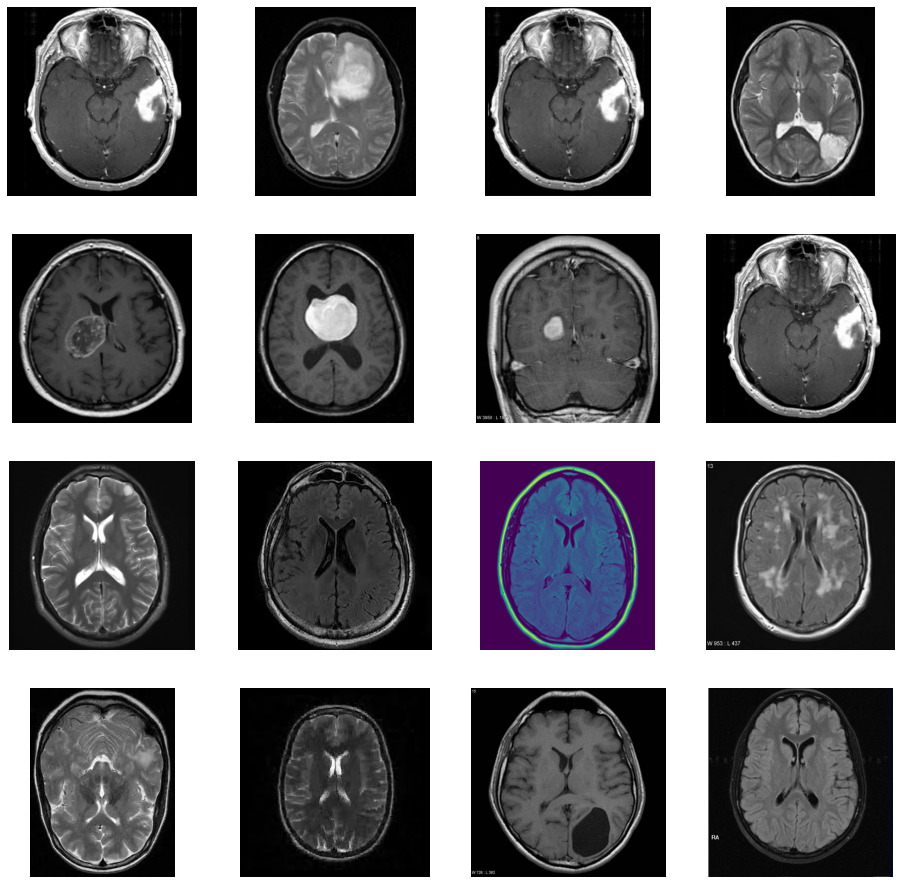

In [44]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8


next_braintumor_yes = [os.path.join(train_brain_tumor_yes, fname)
                      for fname in train_braintumor_yes_names[pic_index-8:pic_index]]
next_braintumor_no = [os.path.join(train_brain_tumor_no, fname)
                      for fname in train_braintumor_no_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_braintumor_yes + next_braintumor_no):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/Brain_tumor_dataset/archive/brain_tumor_dataset',
    classes = ['yes','no'],
    target_size=(200,200),
    batch_size = 120,
    class_mode='binary'
)
valid_generator = validation_datagen.flow_from_directory(
    '/tmp/Brain_tumor_dataset/archive',
    classes = ['yes','no'],
    target_size=(200,200),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 198 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


Build Model

In [46]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [47]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5, 5), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    #tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                    #                        activation='relu',padding='same',
                                    #                        input_shape = (200,200,3),
                                    #                        kernel_initializer='he_normal',
                                    #                        bias_initializer='zeros'),
                                    #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [49]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training

In [50]:
history = model.fit(train_generator,
                    # steps_per_epoch=50,
                    epochs=20,
                    verbose=1,
                    validation_data=valid_generator,
                    # validation_steps=5
)

Epoch 1/20
2/2 [==============================] - 4s 1s/step - loss: 1.9498 - accuracy: 0.3990 - val_loss: 1.3873 - val_accuracy: 0.6545
Epoch 2/20
2/2 [==============================] - 3s 1s/step - loss: 0.9583 - accuracy: 0.6919 - val_loss: 0.9207 - val_accuracy: 0.3455
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 0.7036 - accuracy: 0.5606 - val_loss: 0.5175 - val_accuracy: 0.7636
Epoch 4/20
2/2 [==============================] - 3s 1s/step - loss: 0.5426 - accuracy: 0.7222 - val_loss: 0.6234 - val_accuracy: 0.6727
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.5198 - accuracy: 0.6970 - val_loss: 0.5086 - val_accuracy: 0.7818
Epoch 6/20
2/2 [==============================] - 3s 1s/step - loss: 0.4591 - accuracy: 0.8030 - val_loss: 0.4994 - val_accuracy: 0.7818
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.4762 - accuracy: 0.7929 - val_loss: 0.5032 - val_accuracy: 0.7455
Epoch 8/20
2/2 [=========================

Evaluation Accuracy,ROC,AUC

In [51]:
model.evaluate(valid_generator)

3/3 [==============================] - 0s 79ms/step - loss: 0.6070 - accuracy: 0.8182


[0.6069697141647339, 0.8181818127632141]

> Berdasarkan evaluasi didapat akurasi sebesar 81.8%

In [52]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
valid_generator.reset()
preds = model.predict(valid_generator,verbose=1)

3/3 [==============================] - 0s 96ms/step


In [53]:
fpr,tpr,_=roc_curve(valid_generator.classes,preds)

In [54]:
roc_auc=auc(fpr,tpr)

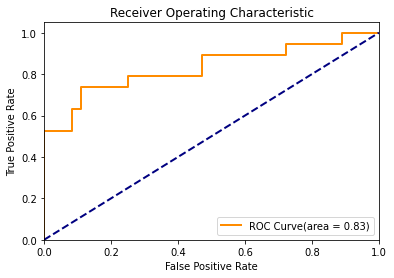

In [55]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',
         lw=lw,label='ROC Curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
model.save('model_2.h5')

Making Predictions

Saving Y112.JPG to Y112 (2).JPG
[0.]
Y112.JPGTumor


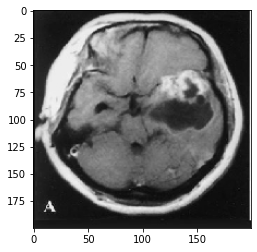

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():

  path = '/content/'+fn
  img = image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size =10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn+"Tumor")
  else:
    print(fn+"Tidak")

> Berdasarkan pengujian gambar Y112 di klasifikasikan sebagai Brain Tumour